In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import morphology

Start!


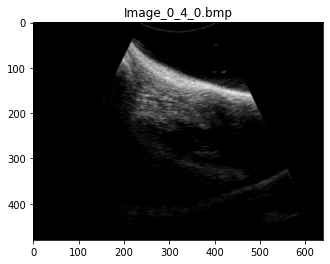

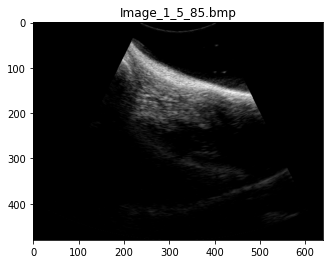

In [16]:
print("Start!")

direc = '/home/jeff/Documents/Ultrascan/Ultrascan_Py/Plantar/Scan_3d__bmp/Scan_3d__bmp/'
Img1 = cv2.imread(direc + 'Image_0_4_0.bmp', cv2.IMREAD_GRAYSCALE) # Load image
Img2 = cv2.imread(direc + 'Image_1_5_85.bmp', cv2.IMREAD_GRAYSCALE) # Load image

plt.figure()
plt.title("Image_0_4_0.bmp")
plt.imshow(Img1, plt.cm.gray)

plt.figure()
plt.title("Image_1_5_85.bmp")
plt.imshow(Img2, plt.cm.gray)

(array([2.40786e+05, 4.03700e+03, 3.00300e+03, 2.47600e+03, 2.12500e+03,
        1.91300e+03, 1.66500e+03, 1.57700e+03, 1.49600e+03, 1.42600e+03,
        1.25700e+03, 1.16100e+03, 1.14900e+03, 1.08300e+03, 9.60000e+02,
        9.82000e+02, 9.46000e+02, 8.38000e+02, 8.15000e+02, 7.26000e+02,
        7.29000e+02, 7.23000e+02, 6.89000e+02, 6.26000e+02, 5.71000e+02,
        5.63000e+02, 5.99000e+02, 5.39000e+02, 5.17000e+02, 5.44000e+02,
        5.08000e+02, 4.78000e+02, 4.22000e+02, 4.25000e+02, 4.17000e+02,
        4.13000e+02, 4.04000e+02, 4.05000e+02, 4.24000e+02, 3.83000e+02,
        3.55000e+02, 3.74000e+02, 3.95000e+02, 3.41000e+02, 3.59000e+02,
        3.63000e+02, 3.36000e+02, 3.51000e+02, 3.44000e+02, 3.00000e+02,
        3.01000e+02, 3.84000e+02, 3.27000e+02, 3.18000e+02, 2.89000e+02,
        3.03000e+02, 2.99000e+02, 3.13000e+02, 2.66000e+02, 2.98000e+02,
        2.89000e+02, 2.59000e+02, 2.66000e+02, 3.03000e+02, 2.60000e+02,
        2.59000e+02, 2.68000e+02, 2.63000e+02, 2.72

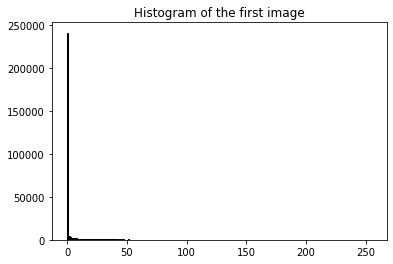

In [3]:
# Shows the histogram of Img1
plt.figure()
plt.title("Histogram of the first image")
plt.hist(Img1.ravel(), bins=256, range=(0.0, 255), fc='k', ec='k')

In [4]:
# Tranposes Img1 then flattens by rows
# Same thing as flattening Img1 by columns
Img1_V = np.transpose(Img1, (1, 0)).flatten()
# Returns indices of the zero elements
# Turns all the 0s to 128s, essentially removes the black spots
Zeros_Img1 = np.where(np.array(Img1_V) == 0)[0]
for i in range(0, len(Zeros_Img1)):
    j = Zeros_Img1[i]
    Img1_V[j] = 128

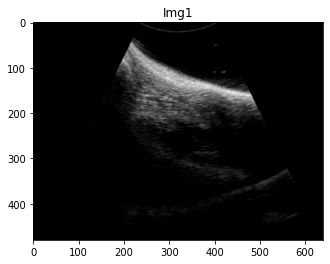

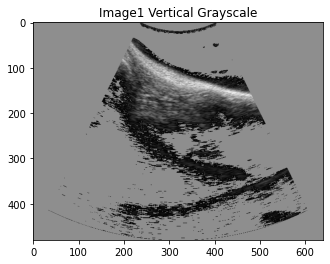

In [12]:
[length, width] = Img1.shape

Img1_V_Gray = np.reshape(Img1_V, (width, length))
Img1_V_Gray_true = np.transpose(Img1_V_Gray, (1, 0))

plt.figure()
plt.title("Img1")
plt.imshow(Img1, plt.cm.gray)

plt.figure()
plt.title("Image1 Vertical Grayscale")
plt.imshow(Img1_V_Gray_true, plt.cm.gray)

In [6]:
# proImg1 = imadjust(Img1_V_Gray_true)
# proImg2 = imadjust(Img1)

# plt.figure()
# plt.title("ProImg1")
# plt.imshow(proImg1)

# plt.figure()
# plt.title("ProImg2")
# plt.imshow(proImg2)

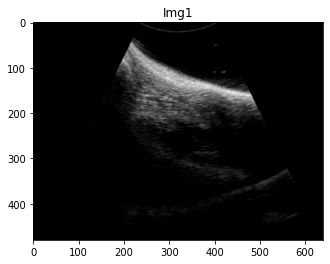

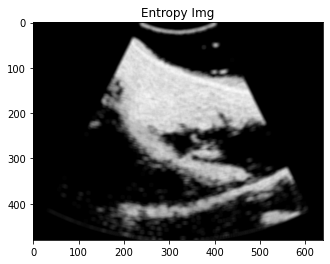

In [13]:
E = entropy(Img1, disk(5))
# All values in E are now in the range 0 to 1
Eim = E * 1/E.max()

plt.figure()
plt.title("Img1")
plt.imshow(Img1, plt.cm.gray)

plt.figure()
plt.title("Entropy Img")
plt.imshow(Eim, plt.cm.gray)

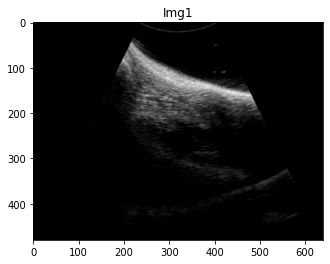

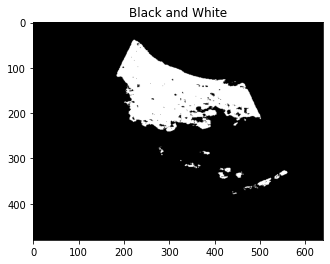

In [14]:
plt.figure()
plt.title("Img1")
plt.imshow(Img1, plt.cm.gray)

# Converts pixels above .8 to 1 and below to 0
ret, BW1 = cv2.threshold(Eim, .8, 1, cv2.THRESH_BINARY)
BW1 = BW1.astype(int)

plt.figure()
plt.title("Black and White")
plt.imshow(BW1, plt.cm.gray)

<ipython-input-15-1be093e1042c>:9: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  BWao = morphology.remove_small_objects(BW1, 2000, 100)


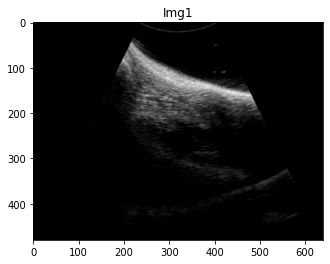

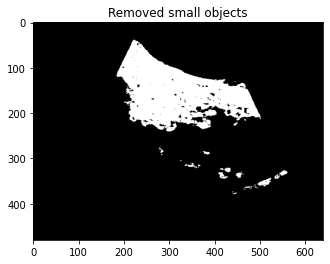

In [15]:
plt.figure()
plt.title("Img1")
plt.imshow(Img1, plt.cm.gray)

# Removes small objects from Img1, couldn't use BW1
# BWao = morphology.remove_small_objects(Img1, 2000, 10)


BWao = morphology.remove_small_objects(BW1, 2000, 100)

plt.figure()
plt.title("Removed small objects")
plt.imshow(BWao, plt.cm.gray)